# ML4HC EX3

### Students: Ido Nathan, Laor Spitz

In [ ]:
# pip install shap

In [1]:
# imports
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris

In [2]:
# Utils Functions
import math
def intervals(x):
    if pd.isnull(x): return 
    if x % 10 == 0:
        return x
    else:
        return round(float(x/10))*10

In [3]:
# Data processing
def init_heart_data():
    heart_data = pd.read_csv(r'C:\Users\Laor\Downloads\heart_mlhc3\archive (1)\heart.csv') 
    heart_data = pd.get_dummies(heart_data, columns=['thal', 'cp'], drop_first=True)
    return heart_data

In [4]:
heart_data = init_heart_data()
heart_data

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,thal_1,thal_2,thal_3,cp_1,cp_2,cp_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,1,0,1,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,1,0,1,0,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,1,0,1,0,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,1,0,0,0,0,1,0,0,0
299,45,1,110,264,0,1,132,0,1.2,1,0,0,0,0,1,0,0,1
300,68,1,144,193,1,1,141,0,3.4,1,2,0,0,0,1,0,0,0
301,57,1,130,131,0,1,115,1,1.2,1,1,0,0,0,1,0,0,0


In [5]:
heart_data.describe()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,thal_1,thal_2,thal_3,cp_1,cp_2,cp_3
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,0.544554,0.059406,0.547855,0.386139,0.165017,0.287129,0.075908
std,9.082101,0.466011,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.498835,0.236774,0.498528,0.487668,0.371809,0.453171,0.265288
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Question 1

#### בדקו האם יש אי הגינות בנתונים לגבי המשתנה המוגן sex . כלומר, בדקו האם 𝑌⊥𝐴

#### In essence we need to check if Pr(Y|A=a) ≈ Pr(Y|A=a*)
#### Developing we get Pr(Y|A=a) = (Pr(Y∩A=a)/Pr(A=a)), Pr(Y|A=a* ) = (Pr(Y∩A=a*)/Pr(A=a * ))
#### So we need to calculate: Pr(A=a* ), Pr(A=a), Pr(Y∩A=a) and Pr(Y∩A=a*) and then apply the conditional probability formula.

In [6]:
pr_Astar = (heart_data['sex'].value_counts()/len(heart_data))[0]
pr_A = (heart_data['sex'].value_counts()/len(heart_data))[1]

In [7]:
heart_data['sex_target'] = heart_data['sex'] & (heart_data['target'])
heart_data['sex*_target'] = (~heart_data['sex']) & (heart_data['target'])
heart_data.head(4)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,thal_1,thal_2,thal_3,cp_1,cp_2,cp_3,sex_target,sex*_target
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,0,1,1,0
1,37,1,130,250,0,1,187,0,3.5,0,0,1,0,1,0,0,1,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,1,0,1,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,2,0,1,0,1,0,1,0,0,1,0


In [8]:
pr_Y_A = (heart_data['sex_target'].value_counts()/len(heart_data))[1]

In [9]:
pr_Y_Astar = (heart_data['sex*_target'].value_counts()/len(heart_data))[1]

#### Pr(Y∩A=a) = 31%, Pr(Y∩A=a*) = 24%
#### Let's calculate then! shall we?

In [10]:
abs(pr_Y_Astar/pr_Astar - pr_Y_A/pr_A)

0.3007246376811595

#### The difference seems big.
#### It appears that the data is biased towards saying there's more heart problems risk for females.

In [11]:
pr_Y_Astar/pr_Astar

0.75

## Question 2

בנו מודל שכולל את המשתנה המוגן )למרות שבדרך כלל נשתדל להימנע מלעשות את זה( וחוזה את
הסיכון לתוצאה. בדקו האם המודל הזה הוגן, כלומר בדקו האם 𝑌̂⊥𝐴|𝑋 באופן שולי עבור כל אחד
מהמשתנים. בפירוט – לכל משתנה חלקו אותו לקבוצות ערכים, ובכל ערך חשבו את ערכי 𝑌̂ בכל קבוצה
של המשתנה המוגן. האם אתם מצפים שיהיה הוגן? ) 20 נקודות (

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
heart_data = init_heart_data()

In [14]:
heart_data['age_interval'] = heart_data['age'].apply(intervals)
heart_data['normal_chol'] = (heart_data['chol'] >= 125) & (heart_data['chol'] <= 200) # according to https://medlineplus.gov/cholesterollevelswhatyouneedtoknow.html
heart_data['restecg_0'] = heart_data['restecg'] == 0
heart_data['restecg_1'] = heart_data['restecg'] == 1
heart_data['restecg_2'] = heart_data['restecg'] == 2
heart_data['normal_bps'] = heart_data['trestbps'] <= 120

In [15]:
heart_data['oldpeak_interval'] = heart_data['oldpeak'].apply(int)
heart_data['thalach_interval'] = heart_data['thalach'].apply(intervals)

In [17]:
features = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal_1', 'thal_2', 'thal_3',
       'cp_1', 'cp_2', 'cp_3']
target = ['target']
import numpy as np
X = heart_data[features]
y = np.ravel(heart_data[target])

In [18]:
gb = GradientBoostingClassifier(random_state=42).fit(X, y)

In [19]:
heart_data['predictions'] = gb.predict(X)

In [20]:
def print_probs(model,df,column_name,interval_column_name):
    probs = dict()
    for name,group in df.groupby(interval_column_name):
        probs[name] = group[group['predictions'] == 1].size/group.size
    for key in probs.keys():
        print(f'Pr(Y_hat|a={key},X)={probs[key]}')

In [21]:
col_dict = {'age':'age_interval','chol':'normal_chol','trestbps':'normal_bps','oldpeak':'oldpeak_interval','thalach':'thalach_interval'}

Some of the variables have strong connection to heart diseases so we definitely expect to see unfairness in some of the variables. For example, seeing young people with heart problems is pretty rare while older people mostly suffer from some kind of a heart problem.

In [22]:
for feature in features:
    print(feature)
    if feature in col_dict.keys():
        print_probs(gb,heart_data,feature,col_dict[feature])
    else:
        print_probs(gb,heart_data,feature,feature)
    print('-------------')

age
Pr(Y_hat|a=30,X)=1.0
Pr(Y_hat|a=40,X)=0.7377049180327869
Pr(Y_hat|a=50,X)=0.6625
Pr(Y_hat|a=60,X)=0.38095238095238093
Pr(Y_hat|a=70,X)=0.5161290322580645
Pr(Y_hat|a=80,X)=0.5
-------------
sex
Pr(Y_hat|a=0,X)=0.75
Pr(Y_hat|a=1,X)=0.45410628019323673
-------------
trestbps
Pr(Y_hat|a=False,X)=0.5097087378640777
Pr(Y_hat|a=True,X)=0.6288659793814433
-------------
chol
Pr(Y_hat|a=False,X)=0.5396825396825397
Pr(Y_hat|a=True,X)=0.5882352941176471
-------------
fbs
Pr(Y_hat|a=0,X)=0.5542635658914729
Pr(Y_hat|a=1,X)=0.5111111111111111
-------------
restecg
Pr(Y_hat|a=0,X)=0.46258503401360546
Pr(Y_hat|a=1,X)=0.6381578947368421
Pr(Y_hat|a=2,X)=0.25
-------------
thalach
Pr(Y_hat|a=70,X)=0.0
Pr(Y_hat|a=90,X)=0.0
Pr(Y_hat|a=100,X)=0.2
Pr(Y_hat|a=110,X)=0.14285714285714285
Pr(Y_hat|a=120,X)=0.4
Pr(Y_hat|a=130,X)=0.24
Pr(Y_hat|a=140,X)=0.36585365853658536
Pr(Y_hat|a=150,X)=0.6341463414634146
Pr(Y_hat|a=160,X)=0.6363636363636364
Pr(Y_hat|a=170,X)=0.75
Pr(Y_hat|a=180,X)=0.88
Pr(Y_hat|a=190,X)=1.0

These are the variables that show unfairness: age, sex, rest ecg, thalach, ex ang, oldpeak, slope, ca, thal, cp_1 and cp_2.

A note: for some of the variables we can get different results depending on how we divide the data into intervals.

## Question 3

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc,roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [24]:
heart_data = init_heart_data()

In [25]:

features = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal_1', 'thal_2', 'thal_3',
       'cp_1', 'cp_2', 'cp_3']
target = ['target']

X = heart_data[features]
y = np.ravel(heart_data[target])

# In order to have effective prediction results we must shrink our data thus percentages may change but the
# ratio should be consistent.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=heart_data[['target', 'sex']], random_state=42)

In [26]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

In [27]:
score = gb.score(X_test, y_test)
score

0.77

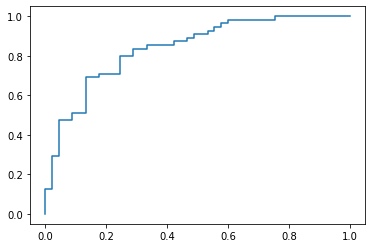

In [28]:
# Logreg ROC AUC

y_hat_probs = gb.predict_proba(X_test)[:,1:]
fpr,tpr,thresholds = roc_curve(y_test,y_hat_probs)
plt.plot(fpr,tpr)
plt.show()

In [18]:
auc_score = roc_auc_score(y_test,y_hat_probs)
auc_score

0.8387878787878787

#### Now create a proper data that we can measure fairness with prediction on

In [29]:
heart_data_with_pred = X_test.copy(deep=True)

In [30]:
heart_data_with_pred.head(5)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal_1,thal_2,thal_3,cp_1,cp_2,cp_3
230,47,1,108,243,0,1,152,0,0.0,2,0,0,1,0,0,1,0
258,62,0,150,244,0,1,154,1,1.4,1,0,0,1,0,0,0,0
18,43,1,150,247,0,1,171,0,1.5,2,0,0,1,0,0,0,0
75,55,0,135,250,0,0,161,0,1.4,1,0,0,1,0,1,0,0
266,55,0,180,327,0,2,117,1,3.4,1,0,0,1,0,0,0,0


In [31]:
heart_data_with_pred['sex'].value_counts()/len(heart_data_with_pred)

1    0.68
0    0.32
Name: sex, dtype: float64

In [32]:
heart_data_with_pred['y'] = y_test

In [33]:
heart_data_with_pred['sex_target'] = heart_data_with_pred['sex'] & (heart_data_with_pred['y'])
heart_data_with_pred['sex*_target'] = ~heart_data_with_pred['sex'] & (heart_data_with_pred['y'])

In [34]:
y_hat = gb.predict(X_test)

In [35]:
heart_data_with_pred['y_hat'] = y_hat
heart_data_with_pred.head(5)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,...,thal_1,thal_2,thal_3,cp_1,cp_2,cp_3,y,sex_target,sex*_target,y_hat
230,47,1,108,243,0,1,152,0,0.0,2,...,0,1,0,0,1,0,0,0,0,1
258,62,0,150,244,0,1,154,1,1.4,1,...,0,1,0,0,0,0,0,0,0,1
18,43,1,150,247,0,1,171,0,1.5,2,...,0,1,0,0,0,0,1,1,0,1
75,55,0,135,250,0,0,161,0,1.4,1,...,0,1,0,1,0,0,1,0,1,1
266,55,0,180,327,0,2,117,1,3.4,1,...,0,1,0,0,0,0,0,0,0,0


בדקו האם המודל הזה מאפשר הפרדה בין המשתנה המוגן לחיזוי, כלומר האם 𝑌̂⊥𝐴|𝑋,𝑌 . האם אתם
מצפים שיאפשר הפרדה? ) 20 נקודות (

#### We expect it to not separate. Because it uses the feature that is already biased the model will be biased as well.

#### In essence we need to check if Pr(Y^|A=a∩Y=1) ≈ Pr(Y^|A=a*∩Y=1)
#### Developing we get Pr(Y^|A=a^Y=1) = (Pr(Y^∩A=a∩Y=1)/Pr(A=a∩Y=1)), Pr(Y^|A=a* ∩Y=1) = (Pr(Y^∩A=a*∩Y=1)/Pr(A=a *∩Y=1))
#### So we need to calculate: Pr(A=a* ∩Y=1), Pr(A=a∩Y=1), Pr(Y^∩A=a∩Y=1) and Pr(Y^∩A=a*∩Y=1) and then apply the conditional probability formula.

#### Pr(Y∩A=a) and Pr(Y∩A=a*)

In [36]:
Y_A = (heart_data_with_pred['sex_target'].value_counts()/len(heart_data_with_pred))[1]
Y_A

0.31

In [37]:
Y_Astar = (heart_data_with_pred['sex*_target'].value_counts()/len(heart_data_with_pred))[1]
Y_Astar

0.24

In [38]:
heart_data_with_pred['sex_target_predicted'] = heart_data_with_pred['sex'] & (heart_data_with_pred['y']) & heart_data_with_pred['y_hat']
heart_data_with_pred['sex*_target_predicted'] = (~heart_data_with_pred['sex']) & heart_data_with_pred['y'] & heart_data_with_pred['y_hat']
heart_data_with_pred.head(4)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,...,thal_3,cp_1,cp_2,cp_3,y,sex_target,sex*_target,y_hat,sex_target_predicted,sex*_target_predicted
230,47,1,108,243,0,1,152,0,0.0,2,...,0,0,1,0,0,0,0,1,0,0
258,62,0,150,244,0,1,154,1,1.4,1,...,0,0,0,0,0,0,0,1,0,0
18,43,1,150,247,0,1,171,0,1.5,2,...,0,0,0,0,1,1,0,1,1,0
75,55,0,135,250,0,0,161,0,1.4,1,...,0,1,0,0,1,0,1,1,0,1


#### (Pr(Y^∩A=a∩Y=1) and (Pr(Y^∩A=a*∩Y=1)

In [39]:
Ypred_A_Y = (heart_data_with_pred['sex_target_predicted'].value_counts()/len(heart_data_with_pred))[1]
Ypred_A_Y

0.22

In [40]:
Ypred_Astar_Y = (heart_data_with_pred['sex*_target_predicted'].value_counts()/len(heart_data_with_pred))[1]
Ypred_Astar_Y

0.21

In [41]:
abs((Ypred_A_Y/Y_A) - (Ypred_Astar_Y/Y_Astar))

0.16532258064516125

#### Verdict: Pretty close! maybe we can say that our model manages to separate the protected feature from the prediction.
#### Note: With more training the model improves in separating (we are keeping the distribution upon shrinking the data)

## Question 4

בנו מודל שלא משתמש במשתנה המוגן ובדקו שוב האם הוא מאפשר הפרדה. ) 10 נקודות (

In [42]:
heart_data = init_heart_data()

In [43]:

features = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal_1', 'thal_2', 'thal_3',
       'cp_1', 'cp_2', 'cp_3']
target = ['target']

X = heart_data[features]
y = np.ravel(heart_data[target])

# In order to have effective prediction results we must shrink our data thus percentages may change but the
# ratio should be consistent.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=heart_data[['target', 'sex']], random_state=42)

#### Now create a proper data that we can measure fairness with prediction on

In [44]:
heart_data_with_pred = X_test.copy(deep=True)

In [45]:
X_test = X_test.drop('sex', axis=1)
X_train = X_train.drop('sex', axis=1)

In [46]:
gb_no_protected = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

In [47]:
heart_data_with_pred.head(5)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal_1,thal_2,thal_3,cp_1,cp_2,cp_3
230,47,1,108,243,0,1,152,0,0.0,2,0,0,1,0,0,1,0
258,62,0,150,244,0,1,154,1,1.4,1,0,0,1,0,0,0,0
18,43,1,150,247,0,1,171,0,1.5,2,0,0,1,0,0,0,0
75,55,0,135,250,0,0,161,0,1.4,1,0,0,1,0,1,0,0
266,55,0,180,327,0,2,117,1,3.4,1,0,0,1,0,0,0,0


In [48]:
score = gb_no_protected.score(X_test, y_test)
score

0.79

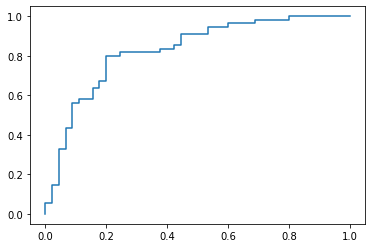

In [49]:
# Logreg ROC AUC

y_hat_probs = gb_no_protected.predict_proba(X_test)[:,1:]
fpr,tpr,thresholds = roc_curve(y_test,y_hat_probs)
plt.plot(fpr,tpr)
plt.show()

In [50]:
auc_score = roc_auc_score(y_test,y_hat_probs)
auc_score

0.8282828282828283

In [51]:
heart_data_with_pred['sex'].value_counts()/len(heart_data_with_pred)

1    0.68
0    0.32
Name: sex, dtype: float64

In [52]:
heart_data_with_pred['y'] = y_test

In [53]:
heart_data_with_pred['sex_target'] = heart_data_with_pred['sex'] & (heart_data_with_pred['y'])
heart_data_with_pred['sex*_target'] = ~heart_data_with_pred['sex'] & (heart_data_with_pred['y'])

In [54]:
y_hat = gb_no_protected.predict(X_test)

In [55]:
heart_data_with_pred['y_hat'] = y_hat
heart_data_with_pred.head(5)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,...,thal_1,thal_2,thal_3,cp_1,cp_2,cp_3,y,sex_target,sex*_target,y_hat
230,47,1,108,243,0,1,152,0,0.0,2,...,0,1,0,0,1,0,0,0,0,1
258,62,0,150,244,0,1,154,1,1.4,1,...,0,1,0,0,0,0,0,0,0,1
18,43,1,150,247,0,1,171,0,1.5,2,...,0,1,0,0,0,0,1,1,0,1
75,55,0,135,250,0,0,161,0,1.4,1,...,0,1,0,1,0,0,1,0,1,1
266,55,0,180,327,0,2,117,1,3.4,1,...,0,1,0,0,0,0,0,0,0,0


#### In essence we need to check if Pr(Y^|A=a∩Y=1) ≈ Pr(Y^|A=a*∩Y=1)
#### Developing we get Pr(Y^|A=a∩Y=1) = (Pr(Y^∩A=a∩Y=1)/Pr(A=a∩Y=1)), Pr(Y^|A=a* ∩Y=1) = (Pr(Y^∩A=a*∩Y=1)/Pr(A=a *∩Y=1))
#### So we need to calculate: Pr(A=a* ∩Y=1), Pr(A=a∩Y=1), Pr(Y^∩A=a∩Y=1) and Pr(Y^∩A=a*∩Y=1) and then apply the conditional probability formula.

#### Pr(Y∩A=a) and Pr(Y∩A=a*)

In [56]:
Y_A = (heart_data_with_pred['sex_target'].value_counts()/len(heart_data_with_pred))[1]
Y_A

0.31

In [57]:
Y_Astar = (heart_data_with_pred['sex*_target'].value_counts()/len(heart_data_with_pred))[1]
Y_Astar

0.24

In [58]:
heart_data_with_pred['sex_target_predicted'] = heart_data_with_pred['sex'] & (heart_data_with_pred['y']) & heart_data_with_pred['y_hat']
heart_data_with_pred['sex*_target_predicted'] = (~heart_data_with_pred['sex']) & heart_data_with_pred['y'] & heart_data_with_pred['y_hat']
heart_data_with_pred.head(4)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,...,thal_3,cp_1,cp_2,cp_3,y,sex_target,sex*_target,y_hat,sex_target_predicted,sex*_target_predicted
230,47,1,108,243,0,1,152,0,0.0,2,...,0,0,1,0,0,0,0,1,0,0
258,62,0,150,244,0,1,154,1,1.4,1,...,0,0,0,0,0,0,0,1,0,0
18,43,1,150,247,0,1,171,0,1.5,2,...,0,0,0,0,1,1,0,1,1,0
75,55,0,135,250,0,0,161,0,1.4,1,...,0,1,0,0,1,0,1,1,0,1


#### (Pr(Y^∩A=a∩Y=1) and (Pr(Y^∩A=a*∩Y=1)

In [59]:
Ypred_A_Y = (heart_data_with_pred['sex_target_predicted'].value_counts()/len(heart_data_with_pred))[1]
Ypred_A_Y

0.24

In [60]:
Ypred_Astar_Y = (heart_data_with_pred['sex*_target_predicted'].value_counts()/len(heart_data_with_pred))[1]
Ypred_Astar_Y

0.21

In [61]:
abs((Ypred_A_Y/Y_A) - (Ypred_Astar_Y/Y_Astar))

0.10080645161290325

#### Verdict: Even better! maybe we can say that our model manages to separate the protected feature from the prediction.
#### Note: not using the protected feature in model training indeed improves separation it seems.

## Question 5

הפעילו את SHAP על המודל שאימנתם עם KernelExplainer . מהם 5 המשתנים הכי חשובים באופן
ממוצע על פני כל הדגימות?

In [62]:
import shap

Using 203 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


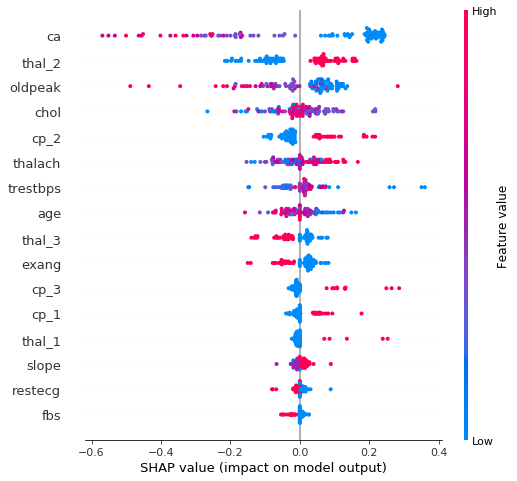

In [63]:
explainer = shap.KernelExplainer(gb_no_protected.predict, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

#### As apparent in the Tornado Graph from SHAP the 5 most impacting features in our model are: 
#### ca, thal_2, oldpeak, chol, cp_2

## Question 6

האם יש הבדל במשתנים המסבירים בין 2 הקבוצות של המשתנה המוגן ?

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=heart_data[['target', 'sex']], random_state=42)
female_train, female_test = X_train[X_train['sex']==0],X_test[X_test['sex']==0]
male_train, male_test = X_train[X_train['sex']==1],X_test[X_test['sex']==1]

In [69]:
#X_test = X_test.drop('sex', axis=1)
#X_train = X_train.drop('sex', axis=1)
female_test = female_test.drop('sex', axis=1)
female_train = female_train.drop('sex', axis=1)
male_test = male_test.drop('sex', axis=1)
male_train = male_train.drop('sex', axis=1)

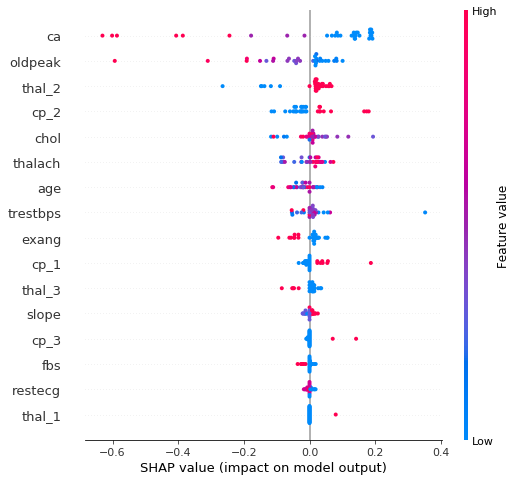

In [73]:
f_explainer = shap.KernelExplainer(gb_no_protected.predict, female_train)
shap_values = f_explainer.shap_values(female_test)
shap.summary_plot(shap_values, female_test)

Using 139 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


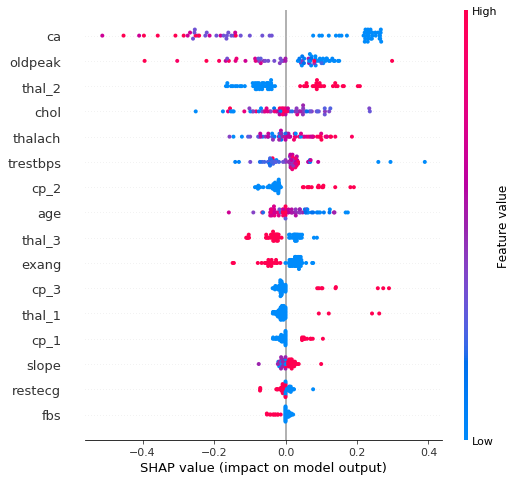

In [74]:
m_explainer = shap.KernelExplainer(gb_no_protected.predict, male_train)
shap_values = m_explainer.shap_values(male_test)
shap.summary_plot(shap_values, male_test)

### Yes there is a difference as can be seen.